https://github.com/pytransitions/transitions

![](transitions.png)

In [24]:
from transitions import Machine

In [25]:
# 定义一个自己的类
class Matter(object):
    pass
model = Matter()

In [26]:
# 状态定义
states=['solid', 'liquid', 'gas', 'plasma']


# 定义状态转移
# The trigger argument defines the name of the new triggering method
transitions = [
    {'trigger': 'melt', 'source': 'solid', 'dest': 'liquid' },
    {'trigger': 'evaporate', 'source': 'liquid', 'dest': 'gas'},
    {'trigger': 'sublimate', 'source': 'solid', 'dest': 'gas'},
    {'trigger': 'ionize', 'source': 'gas', 'dest': 'plasma'}]

In [27]:
# 初始化
machine = Machine(model=model, states=states, transitions=transitions, initial='solid')


In [28]:
# Test 
model.state    # solid

'solid'

In [29]:
# 状体转变
model.melt()

True

In [30]:
model.state   # liquid

'liquid'

In [31]:
model.evaporate()

True

In [32]:
model.state

'gas'

## 

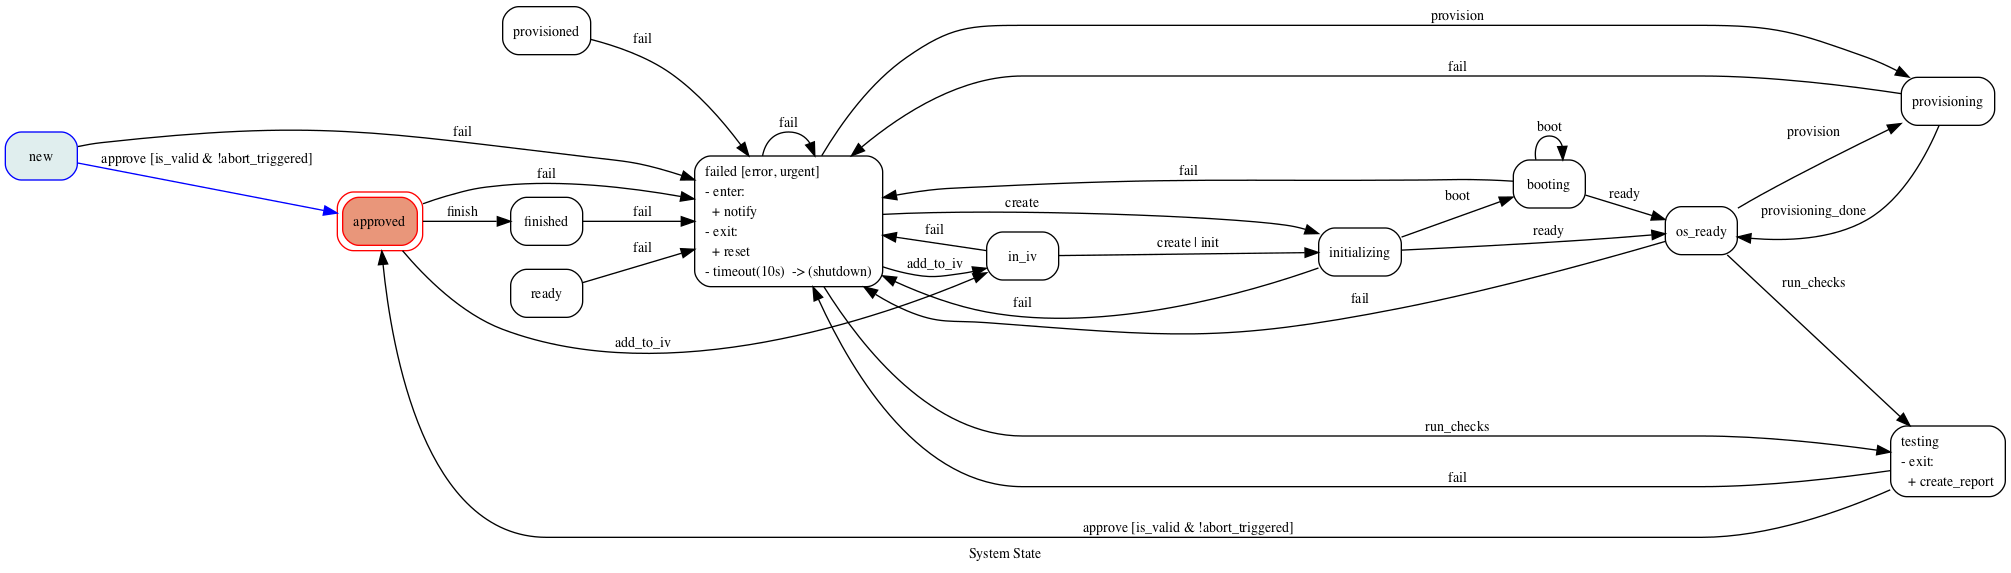

In [33]:
from transitions.extensions.states import Timeout, Tags, add_state_features
from transitions.extensions.diagrams import GraphMachine

import io
from IPython.display import Image, display, display_png


@add_state_features(Timeout, Tags)
class CustomMachine(GraphMachine):
    pass


states = ['new', 'approved', 'ready', 'finished', 'provisioned',
          {'name': 'failed', 'on_enter': 'notify', 'on_exit': 'reset',
           'tags': ['error', 'urgent'], 'timeout': 10, 'on_timeout': 'shutdown'},
          'in_iv', 'initializing', 'booting', 'os_ready', {'name': 'testing', 'on_exit': 'create_report'},
          'provisioning']

transitions = [{'trigger': 'approve', 'source': ['new', 'testing'], 'dest':'approved',
                'conditions': 'is_valid', 'unless': 'abort_triggered'},
               ['fail', '*', 'failed'],
               ['add_to_iv', ['approved', 'failed'], 'in_iv'],
               ['create', ['failed','in_iv'], 'initializing'],
               ['init', 'in_iv', 'initializing'],
               ['finish', 'approved', 'finished'],
               ['boot', ['booting', 'initializing'], 'booting'],
               ['ready', ['booting', 'initializing'], 'os_ready'],
               ['run_checks', ['failed', 'os_ready'], 'testing'],
               ['provision', ['os_ready', 'failed'], 'provisioning'],
               ['provisioning_done', 'provisioning', 'os_ready']]


class Model:
    
    # graph object is created by the machine
    def show_graph(self, **kwargs):
        stream = io.BytesIO()
        self.get_graph(**kwargs).draw(stream, prog='dot', format='png')
        display(Image(stream.getvalue()))
    
    def is_valid(self):
        return True
    
    def abort_triggered(self):
        return False

model = Model()
machine = CustomMachine(model=model, states=states, transitions=transitions, initial='new', title='System State',
                        show_conditions=True, show_state_attributes=True)
model.approve()
model.show_graph()

# Your turn! What happens next? 